In [7]:
import sys

import matplotlib.pyplot as plt
import torch
from iopath.common.file_io import PathManager
from iopath.fb.manifold import ManifoldPathHandler


sys.path.insert(0, "fbcode/ar_sharing/body_tracking_3d/models/hmr/")

pathmgr = PathManager()
pathmgr.register_handler(ManifoldPathHandler(), allow_override=True)

%load_ext autoreload
%autoreload 2

I0901 035824.552 _utils_internal.py:179] NCCL_DEBUG env var is set to None


I0901 035824.553 _utils_internal.py:188] NCCL_DEBUG is INFO from /etc/nccl.conf


In [9]:
seq = "downtown_runForBus_01_0"
f_name = f"sample_3dpw_test_seq_{seq}__hmr_coco_all.pth"
remote_path = f"manifold://xr_body/tree/personal/andreydavydov/3dpw_seq_for_tests/{f_name}"

seq = torch.load(pathmgr.get_local_path(remote_path))

num_frames = 339
for k in seq:
    seq[k] = seq[k][:num_frames]
seq.keys()

I0901 035827.564 manifold.py:1435] URL manifold://xr_body/tree/personal/andreydavydov/3dpw_seq_for_tests/sample_3dpw_test_seq_downtown_runForBus_01_0__hmr_coco_all.pth was already cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/3dpw_seq_for_tests/sample_3dpw_test_seq_downtown_runForBus_01_0__hmr_coco_all.pth


dict_keys(['img', 'theta', 'kp_2d', 'kp_3d', 'pred_rotmat', 'pred_shape', 'pred_camera', 'instance_id'])

# gt shape is constant, but we can't get this information

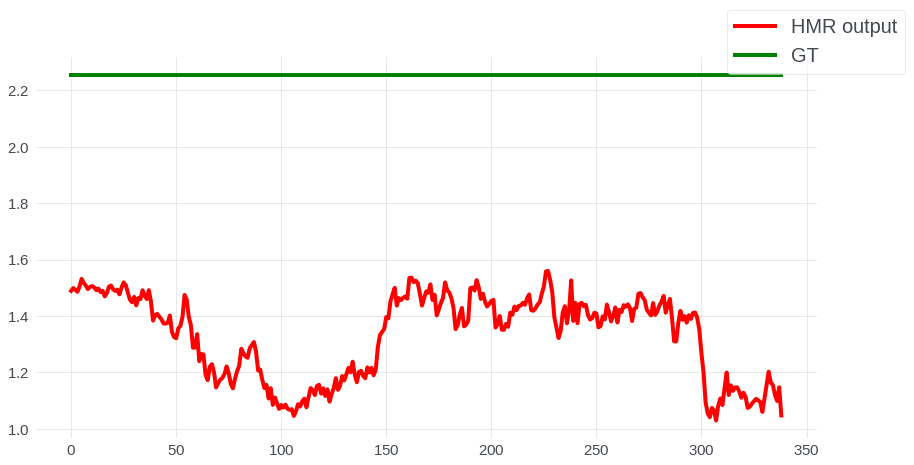

In [10]:
shape = seq["pred_shape"]
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.plot(shape.norm(dim=-1), c='red', label='HMR output')

shape_gt = seq["theta"][:, 75:]
ax.plot(shape_gt.norm(dim=-1), c='green', label='GT')

fig.legend(fontsize=20)
fig.patch.set_facecolor("white")

In [12]:
from src.functional import smpl
device = 'cuda'
smpl_model = smpl.get_smpl_model("extra", device=device)

I0901 035833.475 manifold.py:1435] URL manifold://xr_body/tree/personal/andreydavydov/eft/extradata/smpl/basicModel_neutral_lbs_10_207_0_v1.0.0.pkl was already cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/eft/extradata/smpl/basicModel_neutral_lbs_10_207_0_v1.0.0.pkl


I0901 035833.594 manifold.py:1435] URL manifold://xr_body/tree/personal/andreydavydov/eft/extradata/data_from_spin/J_regressor_extra.npy was already cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/eft/extradata/data_from_spin/J_regressor_extra.npy


# smoother works!

In [13]:
def plot_shape_pose_norm(ckpt_names):

    fig, ax = plt.subplots(1, 2, figsize=(16, 7))

    init_plotted = False
    for name, full_name in ckpt_names.items():
        ckpt_dir = f"manifold://xr_body/tree/personal/andreydavydov/my_exps/{full_name}"
        ckpt = torch.load(pathmgr.get_local_path(f"{ckpt_dir}/ckpt.pth"), map_location='cpu')

        if not init_plotted:   
            ax[0].plot(ckpt["seqOpt_state_dict"]["shape_init"].flatten(start_dim=1).norm(dim=-1), c="green", label='Init', linewidth=5)
            ax[1].plot(ckpt['seqOpt_state_dict']['pose_init'].flatten(start_dim=1).norm(dim=-1), c='green', label='Init', linewidth=5)
            init_plotted = True
        
        ax[0].plot(ckpt["seqOpt_state_dict"]["shape"].flatten(start_dim=1).norm(dim=-1), label=f'{name}', linewidth=3)
        ax[0].set_title('SMPL shape (norm)', fontsize=25)

        ax[1].plot(ckpt['seqOpt_state_dict']['pose'].flatten(start_dim=1).norm(dim=-1), label=f'{name}', linewidth=3)
        ax[1].set_title('SMPL pose (aa, norm)', fontsize=25)

        for axis in ax: axis.legend(fontsize=15, loc='lower right') 
    
    fig.patch.set_facecolor("white")
    
    return fig

I0901 035837.641 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker5__lr_1e-4/ckpt.pth ...


I0901 035838.379 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker5__lr_1e-4/ckpt.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker5__lr_1e-4/ckpt.pth


I0901 035838.394 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker30__lr_1e-4/ckpt.pth ...


I0901 035839.032 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker30__lr_1e-4/ckpt.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker30__lr_1e-4/ckpt.pth


I0901 035839.047 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker100__lr_1e-4/ckpt.pth ...


I0901 035839.615 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker100__lr_1e-4/ckpt.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker100__lr_1e-4/ckpt.pth


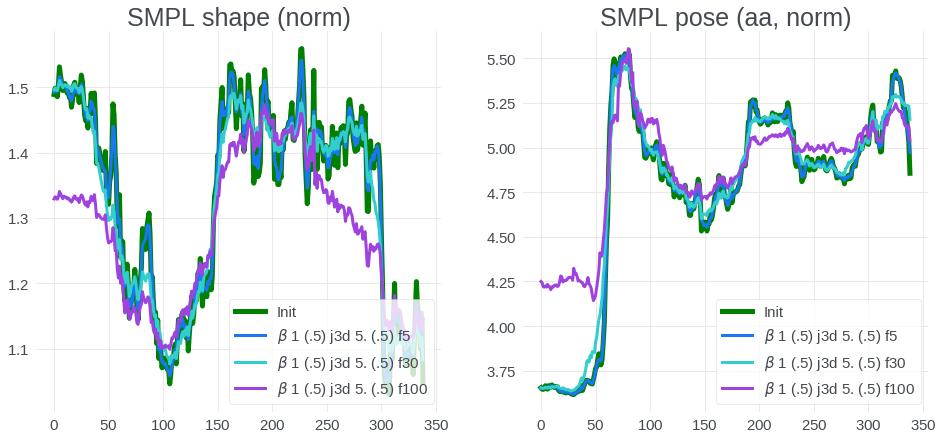

In [14]:
ckpt_names = {
    r"$\beta$ 1 (.5) j3d 5. (.5) f5" : "seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker5__lr_1e-4",
    r"$\beta$ 1 (.5) j3d 5. (.5) f30" : "seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker30__lr_1e-4",
    r"$\beta$ 1 (.5) j3d 5. (.5) f100" : "seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker100__lr_1e-4",
    # r"$\beta$ 1 j3d 5 f30" : "seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1__j3d_5__ker30__lr_1e-4",
    # "S 0.1 j3d 10 f30" : "seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_0_1__j3d_10__ker30__lr_1e-4", # essentially very similar to S 1 --||--. Same yaml???
    # "S 0 j3d 5 (.5) f100" : "seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__j3d_5_data0_5__ker100__lr_1e-4" # very bad! don't show
}

fig = plot_shape_pose_norm(ckpt_names)

# Most importantly, MPJPE does not degrade!

In [15]:
def plot_mpjpes(ckpt_names):
    fig, ax = plt.subplots(1, 2, figsize=(16, 7))
    
    for name, full_name in ckpt_names.items():
        ckpt_dir = f"manifold://xr_body/tree/personal/andreydavydov/my_exps/{full_name}"

        pa_mpjpe_vs_gt_valid = torch.load(pathmgr.get_local_path(f"{ckpt_dir}/metrics/pa_mpjpe_vs_gt_valid.pth"))['prev_vals']
        ax[0].plot(pa_mpjpe_vs_gt_valid, label=name)
        pa_mpjpe_vs_0_valid = torch.load(pathmgr.get_local_path(f"{ckpt_dir}/metrics/pa_mpjpe_vs_0_valid.pth"))['prev_vals']
        ax[1].plot(pa_mpjpe_vs_0_valid, label=name)
        for axis in ax:
            axis.legend(fontsize=15)
        fig.patch.set_facecolor("white")

    ax[0].set_title("PA-MPJPE Opt vs GT, mm", fontsize=20)
    ax[1].set_title("PA-MPJPE Opt vs Init, mm", fontsize=20)
    return fig

I0901 035846.884 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker5__lr_1e-4/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0901 035847.311 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker5__lr_1e-4/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker5__lr_1e-4/metrics/pa_mpjpe_vs_gt_valid.pth


I0901 035847.316 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker5__lr_1e-4/metrics/pa_mpjpe_vs_0_valid.pth ...


I0901 035848.498 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker5__lr_1e-4/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker5__lr_1e-4/metrics/pa_mpjpe_vs_0_valid.pth


I0901 035848.505 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker30__lr_1e-4/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0901 035849.685 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker30__lr_1e-4/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker30__lr_1e-4/metrics/pa_mpjpe_vs_gt_valid.pth


I0901 035849.689 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker30__lr_1e-4/metrics/pa_mpjpe_vs_0_valid.pth ...


I0901 035850.852 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker30__lr_1e-4/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker30__lr_1e-4/metrics/pa_mpjpe_vs_0_valid.pth


I0901 035850.860 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker100__lr_1e-4/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0901 035852.139 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker100__lr_1e-4/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker100__lr_1e-4/metrics/pa_mpjpe_vs_gt_valid.pth


I0901 035852.143 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker100__lr_1e-4/metrics/pa_mpjpe_vs_0_valid.pth ...


I0901 035852.818 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker100__lr_1e-4/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker100__lr_1e-4/metrics/pa_mpjpe_vs_0_valid.pth


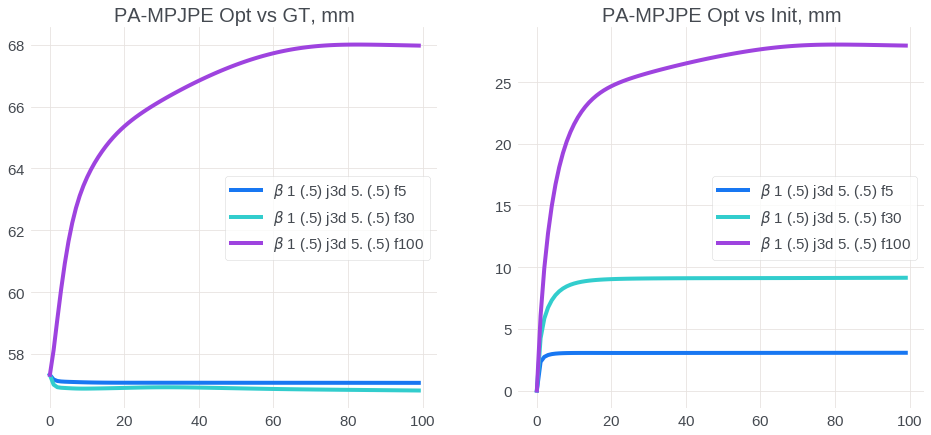

In [16]:
ckpt_names_mpjpes = {
    r"$\beta$ 1 (.5) j3d 5. (.5) f5" : "seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker5__lr_1e-4",
    r"$\beta$ 1 (.5) j3d 5. (.5) f30" : "seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker30__lr_1e-4",
}

fig = plot_mpjpes(ckpt_names)

# while acceleration drops twice!

In [17]:
def plot_accel(ckpt_names):
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))

    for name, full_name in ckpt_names.items():
        ckpt_dir = f"manifold://xr_body/tree/personal/andreydavydov/my_exps/{full_name}"
        accel_err_vs_gt_valid = torch.load(pathmgr.get_local_path(f"{ckpt_dir}/metrics/accel_err_vs_gt_valid.pth"))[
            "prev_vals"
        ]
        ax.plot(accel_err_vs_gt_valid, label=f"vs GT {name}")
        # accel_err_vs_0_valid = torch.load(pathmgr.get_local_path(f"{ckpt_dir}/metrics/accel_err_vs_gt_valid.pth"))["prev_vals"]
        # ax.plot(accel_err_vs_0_valid, label=f"vs Init {name}")

    fig.legend(fontsize=15)
    fig.patch.set_facecolor("white")
    return fig

I0901 035920.114 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker5__lr_1e-4/metrics/accel_err_vs_gt_valid.pth ...


I0901 035920.541 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker5__lr_1e-4/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker5__lr_1e-4/metrics/accel_err_vs_gt_valid.pth


I0901 035920.546 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker30__lr_1e-4/metrics/accel_err_vs_gt_valid.pth ...


I0901 035921.010 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker30__lr_1e-4/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker30__lr_1e-4/metrics/accel_err_vs_gt_valid.pth


I0901 035921.015 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker100__lr_1e-4/metrics/accel_err_vs_gt_valid.pth ...


I0901 035921.256 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker100__lr_1e-4/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker100__lr_1e-4/metrics/accel_err_vs_gt_valid.pth


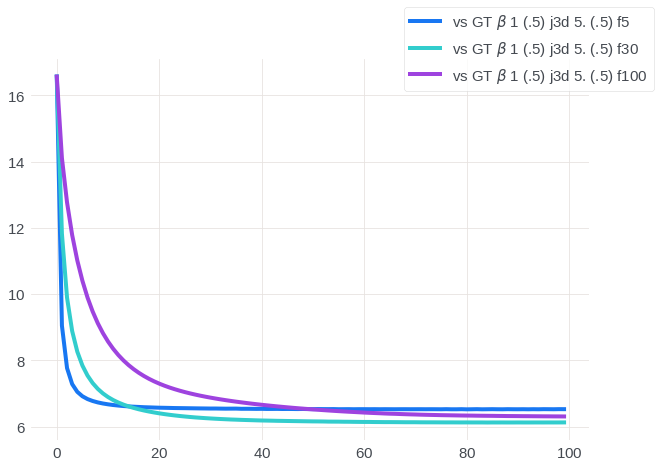

In [18]:
fig = plot_accel(ckpt_names)

# write videos:

In [171]:
from src.utils.video_utils import write_video
from src.functional import smpl
device = "cuda"
smpl_model = smpl.get_smpl_model("h36m", device=device)
fps = 20
batch_size = 339
img_size = torch.tensor([224, 224]).repeat(batch_size, 1).to(device)
faces = smpl_model.faces.astype(int)

import os
video_dir = "/tmp/videos_seq_optim/"
os.makedirs(video_dir, exist_ok=True)

import numpy as np
def render_verts_only(verts, faces, device, img_size=512):
    verts_mean = verts.copy().mean(axis=0, keepdims=True)
    verts -= verts_mean
    scale = 1 #0.8
    verts *= scale
    verts = (verts + 1) / 2 * img_size
    # img = np.zeros((img_size,img_size,3))
    img = (255 * np.ones((img_size,img_size,3))).astype("uint8")
    blend = render_mesh_onto_image(img, verts, faces, device)
    return blend


I0825 052918.115 manifold.py:1435] URL manifold://pai_mobile/tree/body_tracking_3d/projects/andrey_intern/eft/extradata/smpl/basicModel_neutral_lbs_10_207_0_v1.0.0.pkl was already cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/body_tracking_3d/projects/andrey_intern/eft/extradata/smpl/basicModel_neutral_lbs_10_207_0_v1.0.0.pkl


I0825 052918.225 manifold.py:1435] URL manifold://pai_mobile/tree/body_tracking_3d/projects/andrey_intern/eft/extradata/data_from_spin/J_regressor_h36m.npy was already cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/body_tracking_3d/projects/andrey_intern/eft/extradata/data_from_spin/J_regressor_h36m.npy


## original:

In [172]:
from src.datasets.datasets_common import UNNORMALIZE

seq = "downtown_runForBus_01_0"
f_name = f"sample_3dpw_test_seq_{seq}__hmr_coco_all.pth"
remote_path = f"manifold://xr_body/tree/personal/andreydavydov/3dpw_seq_for_tests/{f_name}"

seq = torch.load(pathmgr.get_local_path(remote_path))

num_frames = 339
for k in seq:
    seq[k] = seq[k][:num_frames]

img_orig = UNNORMALIZE(seq["img"]).permute(0, 2, 3, 1).numpy().astype("uint8")

write_video(img_orig, f"{video_dir}orig.mp4", fps=fps)

I0825 052920.409 manifold.py:1435] URL manifold://xr_body/tree/personal/andreydavydov/3dpw_seq_for_tests/sample_3dpw_test_seq_downtown_runForBus_01_0__hmr_coco_all.pth was already cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/3dpw_seq_for_tests/sample_3dpw_test_seq_downtown_runForBus_01_0__hmr_coco_all.pth


Video is saved to '/tmp/videos_seq_optim/orig.mp4'


# prediction of the HMR, w/o optimization

In [173]:
from src.utils.vis_utils import render_mesh_onto_image
from src.utils.img_utils import convert_norm_points_to_bbox
from src.models.seq_optim import get_smpl_out

rotmat_init = seq["pred_rotmat"].to(device)
shape_init = seq["pred_shape"].to(device)
camera_init = seq["pred_camera"].to(device)

_, _, verts_all = get_smpl_out(shape_init, rotmat_init, camera_init, smpl_model, pose2rot=False)

scale, trans = camera_init[:,0], camera_init[:, 1:]
verts_all_bbox = convert_norm_points_to_bbox(verts_all, scale, trans, img_size)

In [174]:
frames_out = []
for i in range(len(verts_all_bbox)):
    verts = verts_all_bbox[i].cpu().numpy()
    img = img_orig[i]
    blend = render_mesh_onto_image(img, verts, faces, device)
    frames_out.append(blend)

write_video(frames_out, f"{video_dir}pred_hmr.mp4", fps=fps)


frames_out = []
for i in range(len(verts_all)):
    verts = verts_all[i].cpu().numpy()
    blend = render_verts_only(verts, faces, device)
    frames_out.append(blend)

write_video(frames_out, f"{video_dir}verts_pred_hmr.mp4", fps=fps)

/data/sandcastle/boxes/fbsource/buck-out/v2/gen/fbcode/b01f384851ab2430/ar_sharing/body_tracking_3d/models/hmr/__bento_kernel_body_tracking__/bento_kernel_body_tracking#link-tree/pytorch3d/renderer/mesh/textures.py:324: PendingDeprecationWarning:

Textures class is deprecated,
        use TexturesUV, TexturesAtlas, TexturesVertex instead.
        Textures class will be removed in future releases.



Video is saved to '/tmp/videos_seq_optim/pred_hmr.mp4'


Video is saved to '/tmp/videos_seq_optim/verts_pred_hmr.mp4'


# Ours. Optimization, smoothing Shape and j3d

In [180]:
for name, full_name in ckpt_names.items():
    ckpt_dir = f"manifold://xr_body/tree/personal/andreydavydov/my_exps/{full_name}"

    ckpt = torch.load(pathmgr.get_local_path(f"{ckpt_dir}/ckpt.pth"), map_location='cpu')['seqOpt_state_dict']

    pose = ckpt["pose"].to(device)
    shape = ckpt["shape"].to(device)
    camera = ckpt["camera"].to(device)

    _, _, verts_all = get_smpl_out(shape, pose, camera, smpl_model, pose2rot=True)
    scale, trans = camera[:,0], camera[:, 1:]
    verts_all_bbox = convert_norm_points_to_bbox(verts_all, scale, trans, img_size)

    frames_out = []
    for i in range(len(verts_all_bbox)):
        verts = verts_all_bbox[i].cpu().numpy()
        img = img_orig[i]
        blend = render_mesh_onto_image(img, verts, faces, device)
        frames_out.append(blend)

    write_video(frames_out, f"{video_dir}Ours_temp_smoothing_{full_name}.mp4", fps=fps)

    frames_out = []
    for i in range(len(verts_all)):
        verts = verts_all[i].cpu().numpy()
        blend = render_verts_only(verts, faces, device)
        frames_out.append(blend)

    write_video(frames_out, f"{video_dir}verts_Ours_temp_smoothing_{full_name}.mp4", fps=fps)

I0825 053920.583 manifold.py:1435] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__j3d_5_data0_5__ker100__lr_1e-4/ckpt.pth was already cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__j3d_5_data0_5__ker100__lr_1e-4/ckpt.pth


Video is saved to '/tmp/videos_seq_optim/Ours_temp_smoothing_seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__j3d_5_data0_5__ker100__lr_1e-4.mp4'


Video is saved to '/tmp/videos_seq_optim/verts_Ours_temp_smoothing_seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__j3d_5_data0_5__ker100__lr_1e-4.mp4'


# merge all together

In [216]:
ckpt_names = {
    r"$\beta$ 1 (.5) j3d 5. (.5) f30" : "seq_optim__coco-all__3dpw_test_seq_339__temp_smooth__shape_1_data0_5__j3d_5_data0_5__ker30__lr_1e-4",
}

In [217]:
from src.utils.video_utils import concat_videos


my_exps_video_paths = [f"{video_dir}verts_Ours_temp_smoothing_{v}.mp4" for v in ckpt_names.values()]

video_paths = [
    # f"{video_dir}orig.mp4", # no need to show original video, maybe for illustration purposes
    f"{video_dir}verts_pred_hmr.mp4",
]
video_paths.extend(my_exps_video_paths)

concat_videos(video_paths, out_path=f"{video_dir}merged.mp4", fps=fps, scale=1)

Video is saved to '/tmp/videos_seq_optim/merged.mp4'


In [220]:
from src.utils.video_utils import concat_videos

my_exps_video_paths = [f"{video_dir}Ours_temp_smoothing_{v}.mp4" for v in ckpt_names.values()]

video_paths = [
    # f"{video_dir}orig.mp4", # no need to show original video, maybe for illustration purposes
    f"{video_dir}pred_hmr.mp4",
]
video_paths.extend(my_exps_video_paths)

concat_videos(video_paths, out_path=f"{video_dir}merged.mp4", fps=fps, scale=3)

Video is saved to '/tmp/videos_seq_optim/merged.mp4'
